In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Data Importing and Cleaning

In [60]:
df = pd.read_csv("comments.csv")
df.head()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,0,wAZZ-UWGVHI,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,1,wAZZ-UWGVHI,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,2,wAZZ-UWGVHI,I will forever acknowledge this channel with t...,161.0,2.0
3,3,wAZZ-UWGVHI,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,4,wAZZ-UWGVHI,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18409 entries, 0 to 18408
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  18409 non-null  int64  
 1   Video ID    18409 non-null  object 
 2   Comment     18408 non-null  object 
 3   Likes       18409 non-null  float64
 4   Sentiment   18409 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 719.2+ KB


In [4]:
df.isnull()

,Unnamed: 0,Video ID,Comment,Likes,Sentiment
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
18404,False,False,False,False,False
18405,False,False,False,False,False
18406,False,False,False,False,False
18407,False,False,False,False,False


In [5]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
18404    False
18405    False
18406    False
18407    False
18408    False
Length: 18409, dtype: bool

In [61]:
df.isna().sum()

Unnamed: 0    0
Video ID      0
Comment       1
Likes         0
Sentiment     0
dtype: int64

In [62]:
mode_val = df['Comment'].mode()[0]

df['Comment'].fillna(mode_val, inplace = True)

In [63]:
df.isna().sum()

Unnamed: 0    0
Video ID      0
Comment       0
Likes         0
Sentiment     0
dtype: int64

In [64]:
df1 = pd.read_csv('videos-stats.csv')
df1.head()

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0


In [65]:
#df1.rename(columns = {'Likes', 'Likes1'})
df1.rename(columns={'Likes': 'Likes1'}, inplace=True)


In [66]:
merg = df1.merge(df, on='Video ID')

In [67]:
merg

,Unnamed: 0_x,Title,Video ID,Published At,Keyword,Likes1,Comments,Views,Unnamed: 0_y,Comment,Likes,Sentiment
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,1,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2,I will forever acknowledge this channel with t...,161.0,2.0
3,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,3,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,4,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18640,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,18404,I really like the point about engineering tool...,0.0,2.0
18641,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,18405,I’ve just started exploring this field. And th...,20.0,2.0
18642,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,18406,Excelente video con una pregunta filosófica pr...,1.0,1.0
18643,1880,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,18407,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


In [68]:
df1 = merg.drop(['Unnamed: 0_y', 'Unnamed: 0_x'], axis = 1)

In [69]:
df1

,Title,Video ID,Published At,Keyword,Likes1,Comments,Views,Comment,Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18640,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,I really like the point about engineering tool...,0.0,2.0
18641,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,I’ve just started exploring this field. And th...,20.0,2.0
18642,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,Excelente video con una pregunta filosófica pr...,1.0,1.0
18643,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,NaN,NaN,NaN,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18645 entries, 0 to 18644
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         18645 non-null  object 
 1   Video ID      18645 non-null  object 
 2   Published At  18645 non-null  object 
 3   Keyword       18645 non-null  object 
 4   Likes1        18625 non-null  float64
 5   Comments      18625 non-null  float64
 6   Views         18625 non-null  float64
 7   Comment       18645 non-null  object 
 8   Likes         18645 non-null  float64
 9   Sentiment     18645 non-null  float64
dtypes: float64(5), object(5)
memory usage: 1.6+ MB


In [16]:
df1.describe()

,Likes1,Comments,Views,Likes,Sentiment
count,1.862500e+04,18625.000000,1.862500e+04,18645.000000,18645.000000
mean,1.753353e+05,8101.347973,1.174082e+07,1044.853955,1.495790
std,8.047016e+05,38183.982425,1.088871e+08,10607.683576,0.708733
min,-1.000000e+00,-1.000000,2.500000e+01,0.000000,0.000000
25%,2.786000e+03,216.000000,9.284100e+04,4.000000,1.000000
50%,1.542500e+04,864.000000,6.173500e+05,29.000000,2.000000
75%,6.210300e+04,3501.000000,2.861258e+06,190.000000,2.000000
max,1.644556e+07,732818.000000,4.034122e+09,891372.000000,2.000000


In [70]:
df1.isnull().sum()

Title            0
Video ID         0
Published At     0
Keyword          0
Likes1          20
Comments        20
Views           20
Comment          0
Likes            0
Sentiment        0
dtype: int64

In [71]:
# df1.columns = df1.columns.str.strip()  # Remove leading/trailing whitespaces from column names

df1['Comments'].fillna(df1['Comments'].mode()[0], inplace=True)


In [72]:
df1['Views'].fillna(df1['Views'].mode()[0], inplace=True)

In [73]:
df1['Likes1'].fillna(df1['Likes1'].mode()[0], inplace=True)

In [74]:
df1.isna().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes1          0
Comments        0
Views           0
Comment         0
Likes           0
Sentiment       0
dtype: int64

# Data Visualization

In [25]:
df.Likes.value_counts()

0.0       1456
1.0       1042
2.0        850
3.0        635
4.0        609
          ... 
3342.0       1
731.0        1
2829.0       1
1086.0       1
2111.0       1
Name: Likes, Length: 2539, dtype: int64

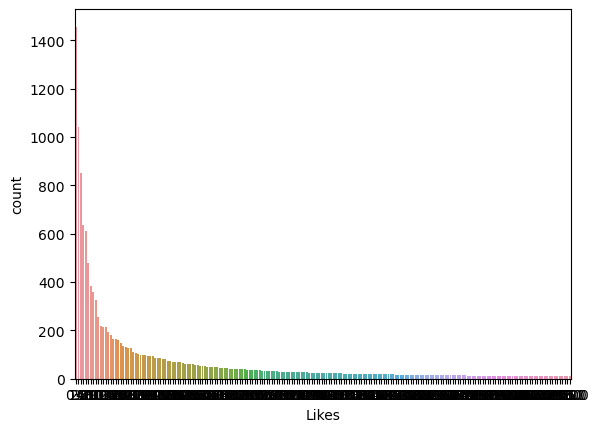

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

likes_counts = df['Likes'].value_counts().head(200)  # Get top 200 counts
sns.countplot(data=df, x='Likes', order=likes_counts.index)  # Use order parameter to specify the order of bars
plt.show()


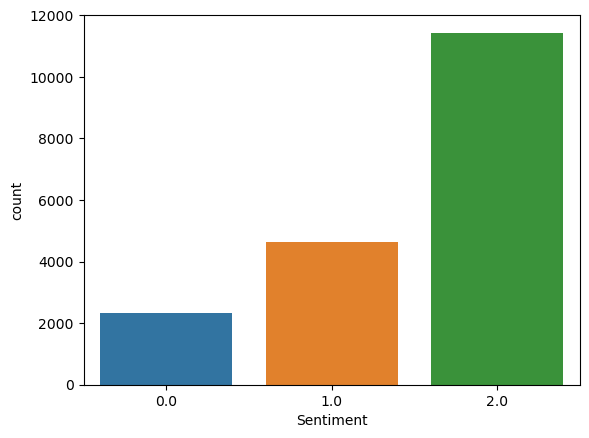

In [27]:
sns.countplot(data=df,x='Sentiment')
plt.show()

In [31]:
df1.columns.values

array(['Title', 'Video ID', 'Published At', 'Keyword', 'Likes1',
       'Comments', 'Views', 'Comment', 'Likes', 'Sentiment'], dtype=object)

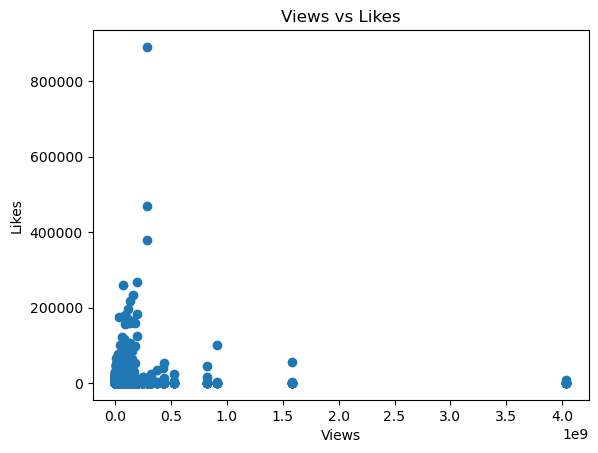

In [33]:
import matplotlib.pyplot as plt

plt.scatter(df1['Views'], df1['Likes'])
plt.xlabel('Views')
plt.ylabel('Likes')
plt.title('Views vs Likes')
plt.show()


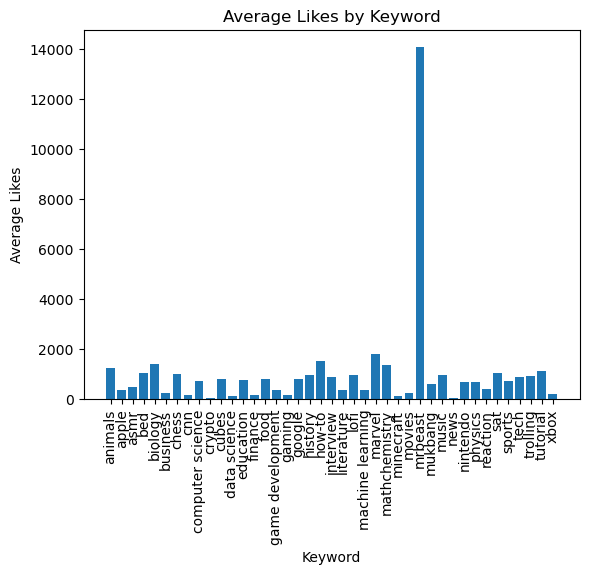

In [35]:
avg_likes_by_keyword = df1.groupby('Keyword')['Likes'].mean()
plt.bar(avg_likes_by_keyword.index, avg_likes_by_keyword.values)
plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Average Likes by Keyword')
plt.xticks(rotation=90)
plt.show()


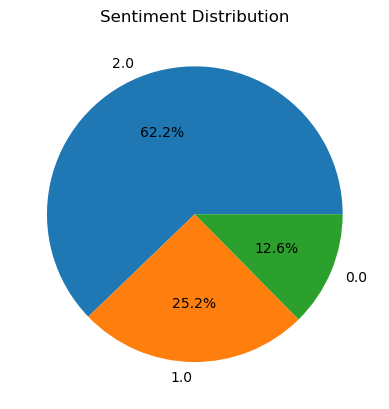

In [38]:
sentiment_counts = df1['Sentiment'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()


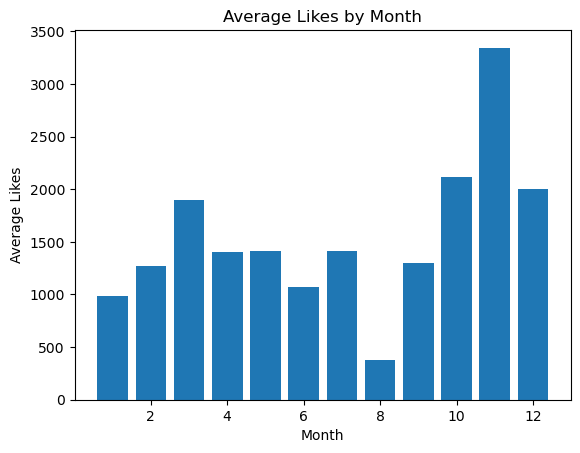

In [39]:
df1['Published Month'] = pd.to_datetime(df1['Published At']).dt.month
avg_likes_by_month = df1.groupby('Published Month')['Likes'].mean()
plt.bar(avg_likes_by_month.index, avg_likes_by_month.values)
plt.xlabel('Month')
plt.ylabel('Average Likes')
plt.title('Average Likes by Month')
plt.show()


# modeling

# linear regression

In [75]:
x = df1["Likes"]
x.head()

0     95.0
1     19.0
2    161.0
3      8.0
4     34.0
Name: Likes, dtype: float64

In [76]:
y = df1["Sentiment"]
y.head()

0    1.0
1    0.0
2    2.0
3    0.0
4    2.0
Name: Sentiment, dtype: float64

In [42]:
# X_ = df1[['Title', 'Video ID', 'Published At', 'Keyword', 'Comments', 'Views']]
X_ = df1[['Comments', 'Views']]
y_ = df1['Likes']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(X_, y_, test_size=0.2, random_state = 0)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)

In [45]:
y_pred

array([6311.31731929,  311.02879331,  290.37977999, ...,  605.22146202,
        363.90877896,  666.91938041])

In [46]:
y_test

6221      475.0
1884        4.0
812         0.0
4981     5342.0
5567        6.0
          ...  
2525       11.0
6114      551.0
17993     711.0
13162      29.0
10517       1.0
Name: Likes, Length: 3729, dtype: float64

# randomforest regression

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [78]:
df1.columns.values

array(['Title', 'Video ID', 'Published At', 'Keyword', 'Likes1',
       'Comments', 'Views', 'Comment', 'Likes', 'Sentiment'], dtype=object)

In [79]:
df1.isnull().sum()

Title           0
Video ID        0
Published At    0
Keyword         0
Likes1          0
Comments        0
Views           0
Comment         0
Likes           0
Sentiment       0
dtype: int64

In [80]:
df1['Comments'] = df1['Comments'].astype(str)


In [81]:
print(df1['Comments'].unique())
print(df1['Comments'].dtype)


['672.0' '4306.0' '3338.0' ... '1004.0' '232.0' '648.0']
object


In [82]:
from sklearn.feature_extraction.text import CountVectorizer

# Create an instance of CountVectorizer
vectorizer = CountVectorizer()

# Fit the vectorizer on the comments
vectorizer.fit(df1['Comments'])

# Transform the comments into a numerical matrix
X_comments = vectorizer.transform(df1['Comments'])


In [83]:
X_comments

<18645x1361 sparse matrix of type '<class 'numpy.int64'>'
	with 18448 stored elements in Compressed Sparse Row format>

In [84]:
df1

,Title,Video ID,Published At,Keyword,Likes1,Comments,Views,Comment,Likes,Sentiment
0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Let's not forget that Apple Pay in 2014 requir...,95.0,1.0
1,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Here in NZ 50% of retailers don’t even have co...,19.0,0.0
2,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,I will forever acknowledge this channel with t...,161.0,2.0
3,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,Whenever I go to a place that doesn’t take App...,8.0,0.0
4,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,"Apple Pay is so convenient, secure, and easy t...",34.0,2.0
...,...,...,...,...,...,...,...,...,...,...
18640,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,-1.0,29.0,13184.0,I really like the point about engineering tool...,0.0,2.0
18641,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,-1.0,29.0,13184.0,I’ve just started exploring this field. And th...,20.0,2.0
18642,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,-1.0,29.0,13184.0,Excelente video con una pregunta filosófica pr...,1.0,1.0
18643,Don&#39;t learn machine learning,cyLWtMSry58,2020-03-30,machine learning,-1.0,29.0,13184.0,"Hey Daniel, just discovered your channel a cou...",35.0,2.0


In [86]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df1['Title_encoded'] = label_encoder.fit_transform(df1['Title'])
df1['Video ID_encoded'] = label_encoder.fit_transform(df1['Video ID'])
df1['Published At_encoded'] = label_encoder.fit_transform(df1['Published At'])
df1['Keyword_encoded'] = label_encoder.fit_transform(df1['Keyword'])
df1['Comments_encoded'] = label_encoder.fit_transform(df1['Comments'])
df1['Views_encoded'] = label_encoder.fit_transform(df1['Views'])
df1['Comment_encoded'] = label_encoder.fit_transform(df1['Comment'])
df1['Sentiment_encoded'] = label_encoder.fit_transform(df1['Sentiment'])

X = df1[['Title_encoded', 'Video ID_encoded', 'Published At_encoded', 'Keyword_encoded', 'Comments_encoded', 'Views_encoded', 'Comment_encoded', 'Sentiment_encoded']]
y = df1['Likes1']


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
rf_model = RandomForestRegressor(random_state=42)

In [90]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [91]:
rf_model.fit(X_train, y_train)

# Calculate the accuracy on the training set
train_accuracy = rf_model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Calculate the accuracy on the test set
test_accuracy = rf_model.score(X_test, y_test)
print("Testing Accuracy:", test_accuracy)


Training Accuracy: 0.9999799268897432
Testing Accuracy: 0.9999933008991798
